### 1. 목표
- 버섯의 특징을 활용해 독/식용 버섯 분류! (이진분류)
- Decision Tree 시각화 & 과대적합 속성 제어
- 특성 중요도 확인하기! 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
data=pd.read_csv('mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.shape

(8124, 23)

In [6]:
#문제, 정답 분리하기
X=data.loc[:,'cap-shape':]
y=data.loc[:,:'poisonous']

In [7]:
data.loc[:,:'poisonous']

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [8]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
y.value_counts()

poisonous
e            4208
p            3916
dtype: int64

In [10]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


### 원-핫 인코딩
- 범주형 데이터를 표현할 때 가장 널리 쓰이는 방법
- 데이터 종류의 수만큼 특성 자리를 만들고 1과 0만을 이용하여 데이터를 표현하는 방법
- 해당하는 데이터는 1,나머지는 모두 0
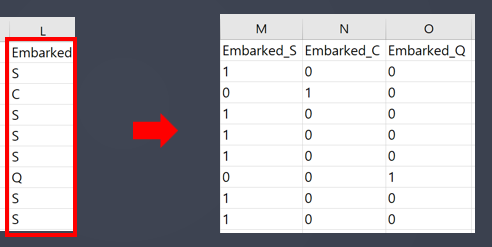

In [11]:
# 학습을 진행하기 위해서는숫자 데이터를 이용해야 한다!
# 범주형 -> 숫자 데이터로 : 인코딩

X_one_hot =pd.get_dummies(X)

### 모델링

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 훈련,테스트 데이터 나눠주기!
X_train,X_test,y_train,y_test =train_test_split(X_one_hot,y,test_size=0.3)
# 함수(문제,정답)

In [14]:
X_train

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1547,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1556,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
174,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
6879,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
643,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
6845,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1496,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
6253,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [15]:
#데이터 크기 파악
X_train.shape,y_train.shape

((5686, 117), (5686, 1))

In [16]:
X_test.shape,y_test.shape

((2438, 117), (2438, 1))

In [17]:
# 모델 생성
tree_model = DecisionTreeClassifier()

In [18]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
tree_model.score(X_train,y_train)

1.0

In [20]:
tree_model.score(X_test,y_test)

1.0

### 시각화 패키지 설치
- graphviz 패키지 이용

In [21]:
!pip install graphviz

In [22]:
# 1.그래프 형태로 시각화 할 수 있는 파일 생성
from sklearn.tree import export_graphviz
export_graphviz(tree_model,out_file='tree.dot',
               class_names=['독','식용'],
               feature_names=X_one_hot.columns,
               impurity=False,
               filled=True)

In [23]:
import os
os.environ['PATH']+=os.pathsep+'C:/Program Files/Graphviz/bin'
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\smhrd\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-90L1OOS',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
        'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
        'HOMEDRIVE': 'C:',
        'HOMEPATH': '\\Users\\smhrd',
        'LOCALAPPDATA': 'C:\\Users\\smhrd\\AppData\\Local',
        'LOGONSERVER': '\\\\DESKTOP-90L1OOS',
        'NUMBER_OF_PROCESSORS': '16',
        'ONEDRIVE': 'C:\\Users\\smhrd\\OneDrive',
        'OS': 'Windows_NT',
        'PATH': 'C:\\Users\\smhrd\\anaconda3;C:\\Users\\smhrd\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\smhrd\\anacond

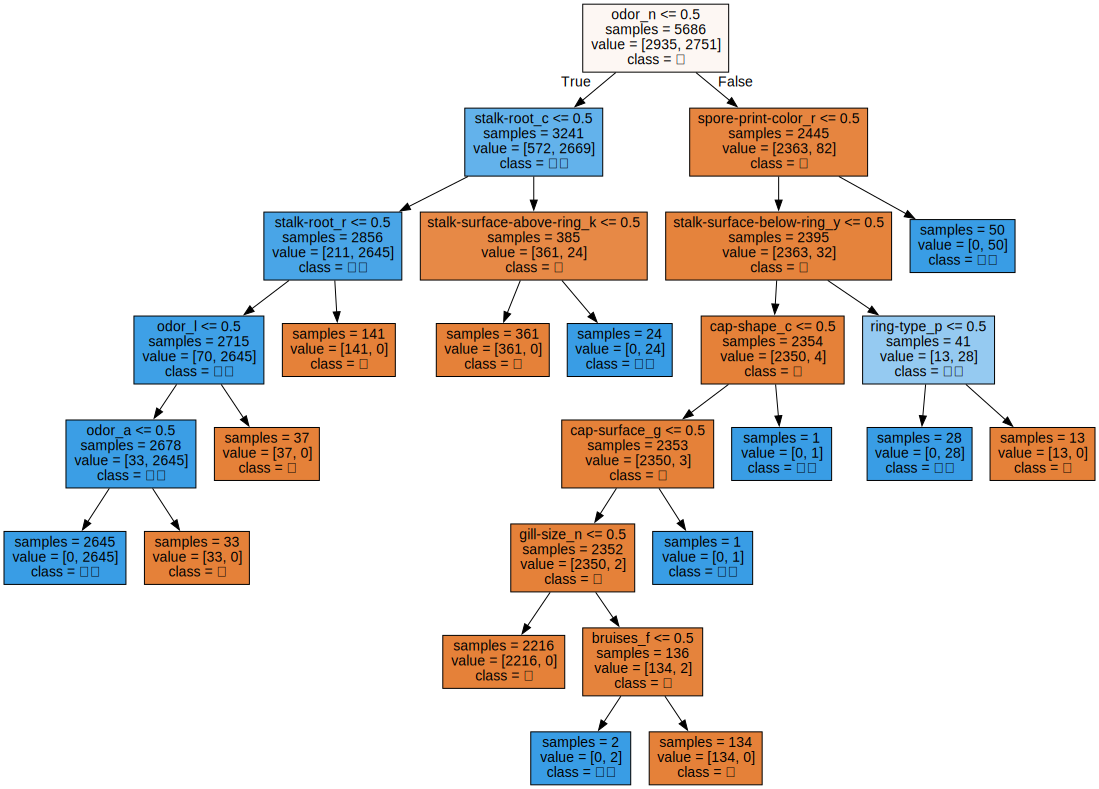

In [24]:
#2. 생성한 파일 시각화
import graphviz

with open('tree.dot',encoding='UTF8')as f:
    dot_graph=f.read()
    
display(graphviz.Source(dot_graph))

### 하이퍼파라미터 조정
- 과적합을 제어해서 일반화 성능을 만드는 것이 목표!

In [25]:
#최대 깊이가 1인 모델 만들고 학습 시킨 후 시각화로 다시 확인해보자
tree_model2=DecisionTreeClassifier(max_depth=3)

In [26]:
tree_model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
#시각화 
from sklearn.tree import export_graphviz
export_graphviz(tree_model2,out_file='tree2.dot',
               class_names=['독','식용'],
               feature_names=X_one_hot.columns,
               impurity=False,
               filled=True)

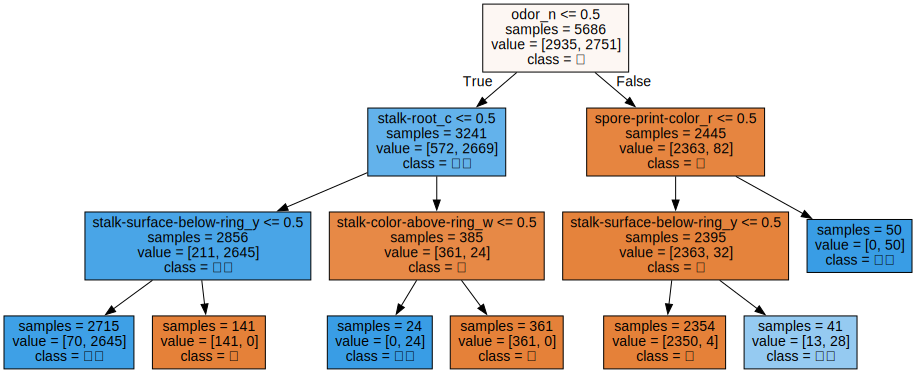

In [28]:
with open('tree2.dot',encoding='UTF8')as f:
    dot_graph=f.read()
    
display(graphviz.Source(dot_graph))

In [29]:
tree_model2.score(X_train,y_train)

0.984699261343651

In [30]:
tree_model2.score(X_test,y_test)

0.9864643150123051

### 특성 중요도
- tree 모델의 특성 중요도

In [31]:
fi=tree_model.feature_importances_
fi

array([0.00000000e+00, 7.02126716e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.02723762e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.38772702e-03, 0.00000000e+00, 2.29528809e-02, 0.00000000e+00,
       0.00000000e+00, 2.50715295e-02, 0.00000000e+00, 6.12469078e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.95146911e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.78261333e-01, 0.00000000e+00, 8.95881540e-02,
      

In [32]:
#tree_model이 계산한 특성 중요도(fi)와 특성의 이름을 이용해 df 생성
importance_df=pd.DataFrame(fi,index=X_one_hot.columns,columns=['name'])

In [33]:
#값 정렬 -내림차순
importance_df.sort_values(by='name',ascending=False)

,name
odor_n,0.612469
stalk-root_c,0.178261
stalk-root_r,0.089588
spore-print-color_r,0.033575
odor_l,0.025072
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_b,0.000000
gill-spacing_w,0.000000


In [34]:
importance_df.sort_values(by='name',ascending=False).head(10)

,name
odor_n,0.612469
stalk-root_c,0.178261
stalk-root_r,0.089588
spore-print-color_r,0.033575
odor_l,0.025072
odor_a,0.022953
stalk-surface-above-ring_k,0.015848
stalk-surface-below-ring_y,0.013170
ring-type_p,0.006252
bruises_f,0.001388
